In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d vuppalaadithyasairam/ultrasound-breast-images-for-breast-cancer

 99% 556M/564M [00:06<00:00, 97.1MB/s]
100% 564M/564M [00:06<00:00, 85.1MB/s]


In [ ]:
!unzip /content/ultrasound-breast-images-for-breast-cancer.zip

In [4]:
import tensorflow as tf
from tensorflow import keras
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import cv2

In [5]:
import os      # Used to work with files and directories.
import numpy as np

x_train = []
y_train = []

image_size = 150
labels = ['benign','malignant']

for i in labels:
  folderPath = os.path.join('/content/ultrasound breast classification/train',i)
  for j in os.listdir(folderPath):
    img = cv2.imread(os.path.join(folderPath,j))
    img = cv2.resize(img,(image_size,image_size))
    x_train.append(img)
    y_train.append(i)

x_train = np.array(x_train)
y_train = np.array(y_train)

In [6]:
x_train,y_train = shuffle(x_train,y_train,random_state=101)

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x_train,y_train,test_size=0.2,random_state=101)

In [11]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6492, 150, 150, 3)
(1624, 150, 150, 3)
(6492, 2)
(1624, 2)


In [9]:
y_train_new = []

for i in y_train:
  y_train_new.append(labels.index(i))

y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []

for i in y_test:
  y_test_new.append(labels.index(i))

y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [10]:
# CNN model

import keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization
from sklearn.metrics import accuracy_score

model = Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))

model.add(BatchNormalization())

model.add(MaxPooling2D(2,2))

model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))

model.add(Dropout(0.3))

model.add(BatchNormalization())

model.add(MaxPooling2D(2,2))

model.add(Dropout(0.3))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))

model.add(BatchNormalization())

model.add(MaxPooling2D(2,2))

model.add(Dropout(0.3))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))

model.add(BatchNormalization())

model.add(MaxPooling2D(2,2))

model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))

model.add(Dropout(0.3))

model.add(Dense(2,activation='softmax'))

In [ ]:
model.summary()

In [13]:
model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])

In [14]:
history = model.fit(x_train,y_train,epochs=11,validation_split=0.1)

Epoch 1/11
183/183 [==============================] - 41s 149ms/step - loss: 0.9752 - accuracy: 0.6960 - val_loss: 0.6199 - val_accuracy: 0.7138
Epoch 2/11
183/183 [==============================] - 23s 126ms/step - loss: 0.2885 - accuracy: 0.8769 - val_loss: 0.4669 - val_accuracy: 0.7908
Epoch 3/11
183/183 [==============================] - 23s 128ms/step - loss: 0.1750 - accuracy: 0.9351 - val_loss: 0.1737 - val_accuracy: 0.9369
Epoch 4/11
183/183 [==============================] - 23s 125ms/step - loss: 0.0782 - accuracy: 0.9747 - val_loss: 0.4219 - val_accuracy: 0.8877
Epoch 5/11
183/183 [==============================] - 23s 125ms/step - loss: 0.0616 - accuracy: 0.9776 - val_loss: 0.8630 - val_accuracy: 0.8231
Epoch 6/11
183/183 [==============================] - 23s 127ms/step - loss: 0.0615 - accuracy: 0.9783 - val_loss: 0.0762 - val_accuracy: 0.9723
Epoch 7/11
183/183 [==============================] - 23s 126ms/step - loss: 0.0380 - accuracy: 0.9861 - val_loss: 0.2687 - val_ac

In [ ]:
# model.save('Breast Cancer.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


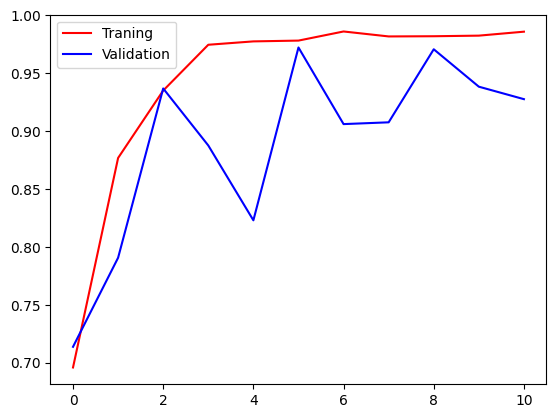

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='r',label='Traning')
plt.plot(history.history['val_accuracy'],color='b',label='Validation')
plt.legend()
plt.show()

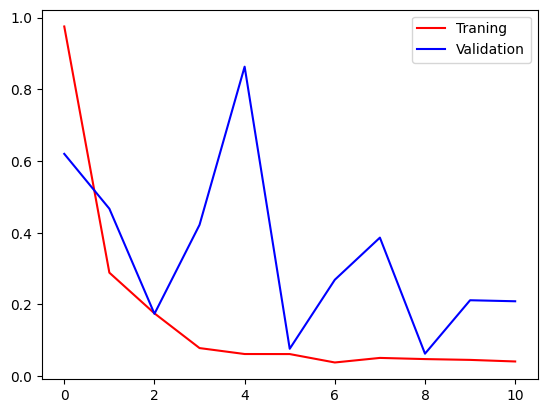

In [16]:
plt.plot(history.history['loss'],color='r',label='Traning')
plt.plot(history.history['val_loss'],color='b',label='Validation')
plt.legend()
plt.show()

In [17]:
# Prediction

img = cv2.imread("/content/ultrasound breast classification/val/benign/benign (2).png")
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

(-0.5, 149.5, 149.5, -0.5)

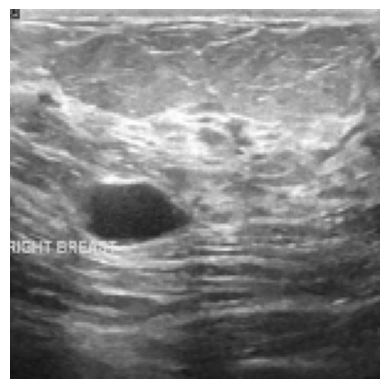

In [18]:
plt.imshow(img)
plt.axis("off")

In [19]:
a = model.predict(img_array)
i = a.argmax()
if i==0:
  print("Patient has Benign Cancer.")
elif i==1:
  print("Patient has Malignant Cancer.")
else:
  print("Patient has other Breast Cancer or No cancer.")

1/1 [==============================] - 1s 734ms/step
Patient has Benign Cancer.


In [33]:
from sklearn.metrics import confusion_matrix

# Predict probabilities for test set
y_pred_prob = model.predict(x_test)

y_pred = np.argmax(y_pred_prob, axis=1)

y_true = np.argmax(y_test, axis=1)  # axis=1 indicates along each row

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]

print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

51/51 [==============================] - 1s 21ms/step
True Positives: 817
True Negatives: 688
False Positives: 88
False Negatives: 31


In [ ]:
# conf_matrix[0, 0] corresponds to the true negatives (TN), which are instances that are actually negative and are predicted as negative.
# conf_matrix[0, 1] corresponds to the false positives (FP), which are instances that are actually negative but are predicted as positive.
# conf_matrix[1, 0] corresponds to the false negatives (FN), which are instances that are actually positive but are predicted as negative.
# conf_matrix[1, 1] corresponds to the true positives (TP), which are instances that are actually positive and are predicted as positive.

In [34]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
print("Accuracy:", accuracy)

Accuracy: 0.9267241379310345


In [35]:
precision = TP / (TP + FP)
print("Precision:", precision)

Precision: 0.9027624309392265


In [36]:
recall = TP / (TP + FN)   # True positive rate
print("Recall:", recall)

Recall: 0.9634433962264151


In [37]:
f1_score = 2 * (precision * recall) / (precision + recall)
print("F1 score:", f1_score)

F1 score: 0.9321163719338276
